# Examples

In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import keras

from pipeline import pipeline, utils
from pipeline import train_and_test
from models.patch_identifier import PatchIdentifier

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Train the MSM on the UC Merced aerial data

In [2]:
def train_msm_on_uc_merced():
    """
    """

    # Load in data
    data_path = "/Users/bdhammel/Documents/insight/data/UCMerced_LandUse/"

    dataset = train_and_test.import_uc_merced.DataSet(data_path)
    Xtrain, Ytrain = dataset.get_train_data()
    Xtest, Ytest = dataset.get_test_data()

    one_hot_ytrain = keras.utils.to_categorical(Ytrain-1, 5)
    one_hot_ytest = keras.utils.to_categorical(Ytest-1, 5)

    ## Augment data

    model = PatchIdentifier()

    # Only train the top of the model, used the features from Resnet
    model.train(Xtrain, one_hot_ytrain, epochs=5, fix_layers=(0,311))
    
    print("Finished Training")

    print("Accuracy: {:.2f}%".format(100*model.evaluate(Xtest, one_hot_ytest)[1]))

    # Save all of your hard work 
    model.save("./models/saved_models/patch_identifier.h5")

In [3]:
#train_msm_on_uc_merced()

Uncommenting the above line will give you something of the sorts:
```
Epoch 1/5
335/335 [==============================] - 55s 165ms/step - loss: 1.1985 - acc: 0.5403
Epoch 2/5
335/335 [==============================] - 65s 193ms/step - loss: 0.6123 - acc: 0.8060
Epoch 3/5
335/335 [==============================] - 67s 201ms/step - loss: 0.4839 - acc: 0.8358
Epoch 4/5
335/335 [==============================] - 65s 193ms/step - loss: 0.2485 - acc: 0.9254
Epoch 5/5
335/335 [==============================] - 63s 188ms/step - loss: 0.3570 - acc: 0.8985
Finished Training
165/165 [==============================] - 35s 210ms/step
Accuracy: 80.00%
```

(-0.5, 399.5, 399.5, -0.5)

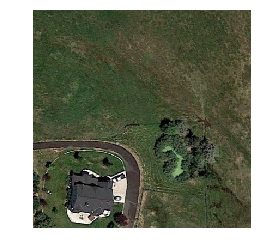

In [12]:
img = pipeline.load_from_file("./datasets/raw_images/test.jpg")
plt.imshow(img.data)
plt.axis('off')

In [5]:
model = PatchIdentifier("./models/saved_models/patch_identifier.h5")

In [6]:
batch = img.as_batch()
predictions = model.predict(batch)

Can only preserve up to pix:  [400 400   3]


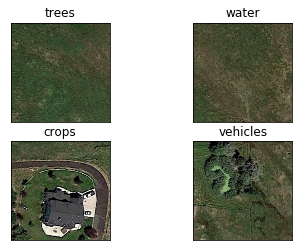

In [14]:
f, axes = plt.subplots(2,2)
labels = utils.ids_to_classes(predictions)
axes[0,0].imshow(batch[0])
axes[0,0].set_title(labels[0])
axes[0,1].imshow(batch[1])
axes[0,1].set_title(labels[1])
axes[1,0].imshow(batch[2])
axes[1,0].set_title(labels[2])
axes[1,1].imshow(batch[3])
axes[1,1].set_title(labels[3])

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])